In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

In [8]:
def espacios ():
    print("\n"*2)


In [9]:

# Cargamos el archivo de datos
sql_connection = sql.connect('data_01_nuevo.db')
data_01 = pd.read_sql_query("SELECT * FROM data_01_nuevo", sql_connection)
data_01['date'] = pd.to_datetime(data_01['date'])
data_01.set_index('date', inplace=True)


In [10]:


print(data_01.info())
espacios()
print(data_01.describe())
espacios()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation 

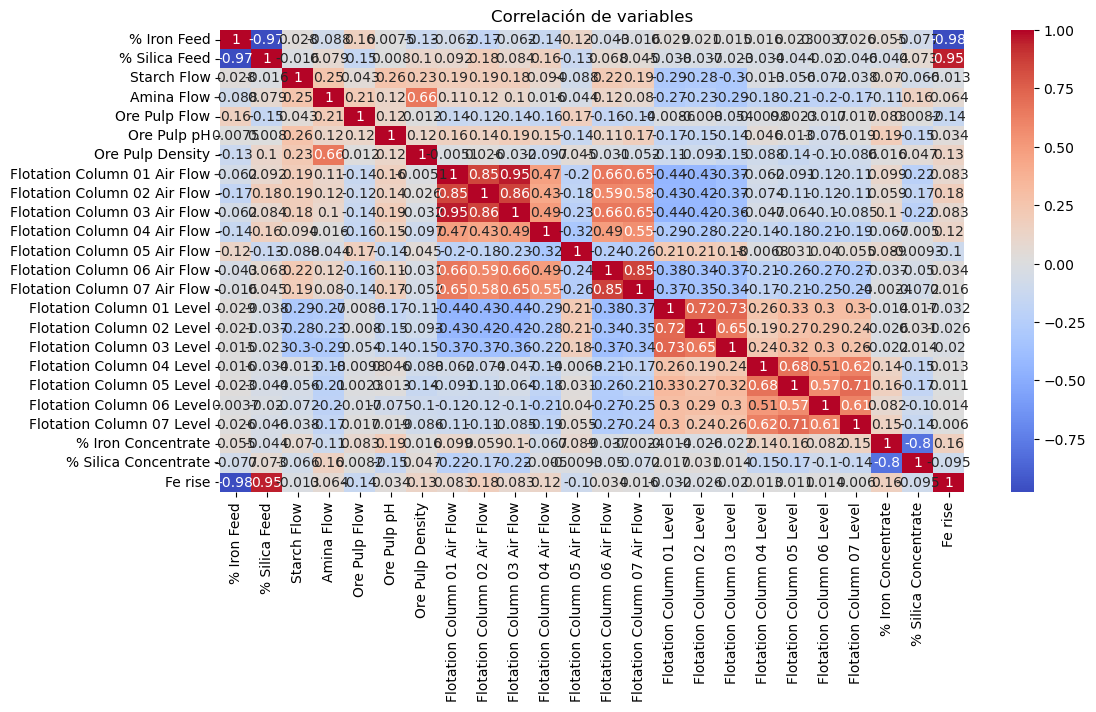

In [11]:

data_01["Fe rise"] = data_01["% Iron Concentrate"] - data_01["% Iron Feed"]
plt.figure(figsize=(12, 6))
sns.heatmap(data_01.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación de variables')
plt.show()


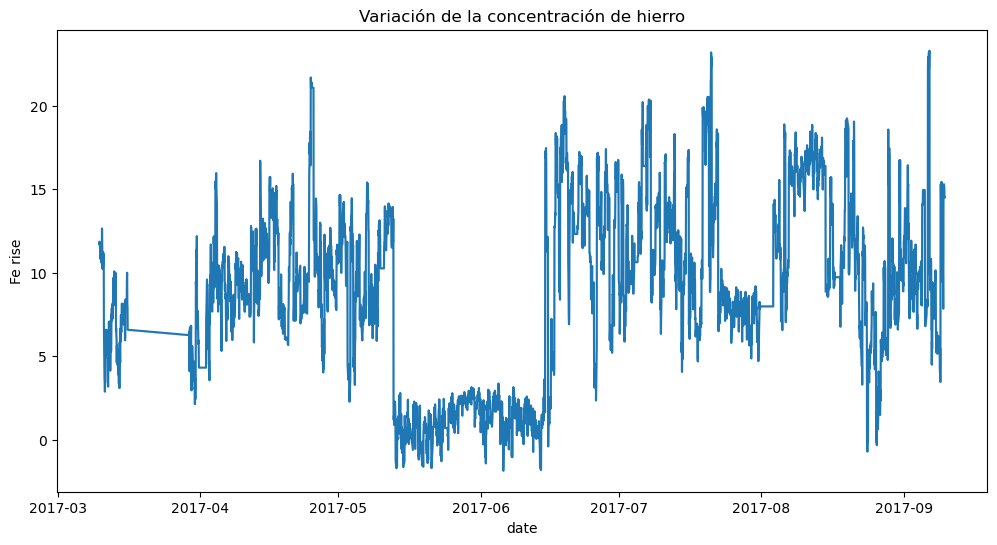

In [12]:
plt.close()
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_01, x='date', y='Fe rise')
plt.title('Variación de la concentración de hierro')
plt.show()

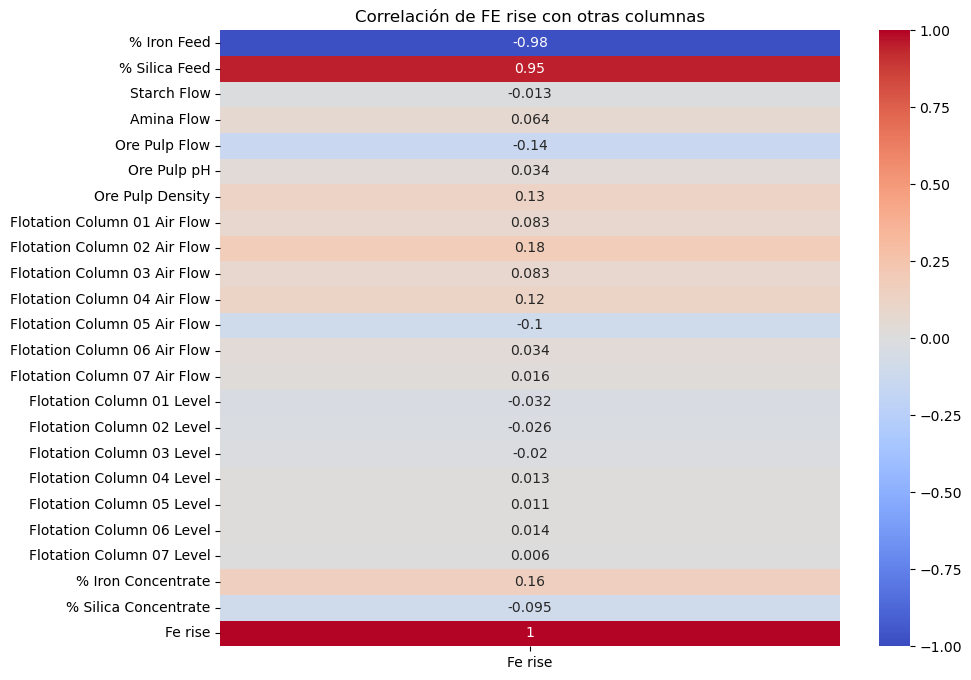

In [14]:
plt.close()
correlation_matrix = data_01.corr()
fe_rise_correlation = correlation_matrix[['Fe rise']]

# Graficar la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(fe_rise_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación de FE rise con otras columnas')
plt.show()